# AirBnb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_palette('mako')
df = pd.read_csv("Airbnb_Open_Data.csv")
df.head()

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_3468/3674107805.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Drop unnecesary columns

In [4]:
df = df.drop(columns=['license', 'id', 'host name', 'NAME', 'house_rules', 'instant_bookable', 'Construction year', 
                     'calculated host listings count', 'availability 365', 'minimum nights', 'host_identity_verified'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host id              102599 non-null  int64  
 1   neighbourhood group  102570 non-null  object 
 2   neighbourhood        102583 non-null  object 
 3   lat                  102591 non-null  float64
 4   long                 102591 non-null  float64
 5   country              102067 non-null  object 
 6   country code         102468 non-null  object 
 7   cancellation_policy  102523 non-null  object 
 8   room type            102599 non-null  object 
 9   price                102352 non-null  object 
 10  service fee          102326 non-null  object 
 11  number of reviews    102416 non-null  float64
 12  last review          86706 non-null   object 
 13  reviews per month    86720 non-null   float64
 14  review rate number   102273 non-null  float64
dtypes: float64(5), in

In [6]:
df.describe()

,host id,lat,long,number of reviews,reviews per month,review rate number
count,1.025990e+05,102591.000000,102591.000000,102416.000000,86720.000000,102273.000000
mean,4.925411e+10,40.728094,-73.949644,27.483743,1.374022,3.279106
std,2.853900e+10,0.055857,0.049521,49.508954,1.746621,1.284657
min,1.236005e+08,40.499790,-74.249840,0.000000,0.010000,1.000000
25%,2.458333e+10,40.688740,-73.982580,1.000000,0.220000,2.000000
50%,4.911774e+10,40.722290,-73.954440,7.000000,0.740000,3.000000
75%,7.399650e+10,40.762760,-73.932350,30.000000,2.000000,4.000000
max,9.876313e+10,40.916970,-73.705220,1024.000000,90.000000,5.000000


In [7]:
df.columns

Index(['host id', 'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'country', 'country code', 'cancellation_policy', 'room type', 'price',
       'service fee', 'number of reviews', 'last review', 'reviews per month',
       'review rate number'],
      dtype='object')

In [8]:
df.shape

(102599, 15)

In [9]:
df.nunique(axis=0)

host id                102057
neighbourhood group         7
neighbourhood             224
lat                     21991
long                    17774
country                     1
country code                1
cancellation_policy         3
room type                   4
price                    1151
service fee               231
number of reviews         476
last review              2477
reviews per month        1016
review rate number          5
dtype: int64

# Cleaning data

Duplicate data

In [10]:
df.shape

(102599, 15)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(102058, 15)

Missing data

In [13]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,3)

last review            15.513
reviews per month      15.499
country                 0.521
review rate number      0.313
service fee             0.267
price                   0.242
number of reviews       0.179
country code            0.128
cancellation_policy     0.074
neighbourhood group     0.028
neighbourhood           0.016
lat                     0.008
long                    0.008
host id                 0.000
room type               0.000
dtype: float64

In [14]:
df['last review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102053     3/27/2019
102054     8/31/2017
102055     6/26/2019
102056           NaN
102057     6/15/2019
Name: last review, Length: 102058, dtype: object

Since "Last review" are dates, and listings without a review will not have a review, we can remove this column and instead focus on reviews per month

In [15]:
df.drop(columns='last review', inplace=True)

In [16]:
df.columns

Index(['host id', 'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'country', 'country code', 'cancellation_policy', 'room type', 'price',
       'service fee', 'number of reviews', 'reviews per month',
       'review rate number'],
      dtype='object')

In [17]:
df['reviews per month'] = df['reviews per month'].replace(np.nan, 0)

In [18]:
df['reviews per month']

0         0.21
1         0.38
2         0.00
3         4.64
4         0.10
          ... 
102053    0.44
102054    0.72
102055    3.12
102056    0.00
102057    0.85
Name: reviews per month, Length: 102058, dtype: float64

###  Column: Country

In [19]:
df.shape

(102058, 14)

In [20]:
df.country.unique()

array(['United States', nan], dtype=object)

In [21]:
df.country.isnull().sum()

532

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

df[["country"]] = imputer.fit_transform(df[["country"]])

df.head()

,host id,neighbourhood group,neighbourhood,lat,long,country,country code,cancellation_policy,room type,price,service fee,number of reviews,reviews per month,review rate number
0,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,strict,Private room,$966,$193,9.0,0.21,4.0
1,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,moderate,Entire home/apt,$142,$28,45.0,0.38,4.0
2,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,flexible,Private room,$620,$124,0.0,0.00,5.0
3,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,moderate,Entire home/apt,$368,$74,270.0,4.64,4.0
4,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,moderate,Entire home/apt,$204,$41,9.0,0.10,3.0


### Pending missing values

In [23]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)

review rate number     0.31
service fee            0.27
price                  0.24
number of reviews      0.18
country code           0.13
cancellation_policy    0.07
neighbourhood group    0.03
neighbourhood          0.02
lat                    0.01
long                   0.01
host id                0.00
country                0.00
room type              0.00
reviews per month      0.00
dtype: float64

In [24]:
df.isnull().sum().sort_values(ascending=False)

review rate number     319
service fee            273
price                  247
number of reviews      183
country code           131
cancellation_policy     76
neighbourhood group     29
neighbourhood           16
lat                      8
long                     8
host id                  0
country                  0
room type                0
reviews per month        0
dtype: int64

For our analysis, we will use neighbourhood group instead of neighbourhood, so we will drop the neighbourhood feature.
Since country code and country will show the same information, we will also drop the country code feature

In [25]:
df["neighbourhood"].nunique()

224

In [26]:
df = df.drop(columns=['neighbourhood'])

In [27]:
df = df.drop(columns=['country code'])

In [28]:
df.head(5)

,host id,neighbourhood group,lat,long,country,cancellation_policy,room type,price,service fee,number of reviews,reviews per month,review rate number
0,80014485718,Brooklyn,40.64749,-73.97237,United States,strict,Private room,$966,$193,9.0,0.21,4.0
1,52335172823,Manhattan,40.75362,-73.98377,United States,moderate,Entire home/apt,$142,$28,45.0,0.38,4.0
2,78829239556,Manhattan,40.80902,-73.94190,United States,flexible,Private room,$620,$124,0.0,0.00,5.0
3,85098326012,Brooklyn,40.68514,-73.95976,United States,moderate,Entire home/apt,$368,$74,270.0,4.64,4.0
4,92037596077,Manhattan,40.79851,-73.94399,United States,moderate,Entire home/apt,$204,$41,9.0,0.10,3.0


### Neighbourhood group: Visualizations

<AxesSubplot:xlabel='neighbourhood group', ylabel='Count'>

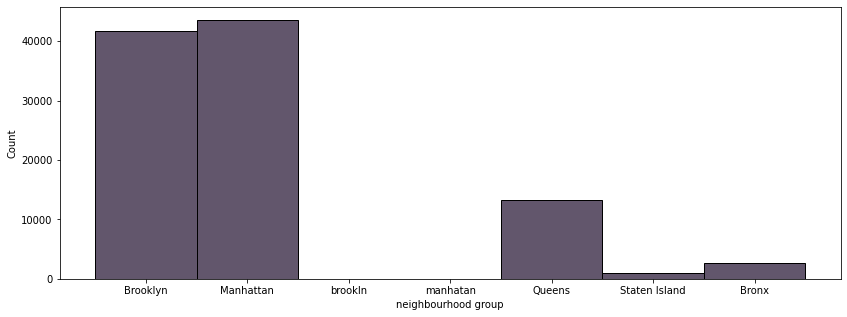

In [29]:
plt.figure(figsize=(14,5))
sns.histplot(data = df, x="neighbourhood group")

In [30]:
df['neighbourhood group'].value_counts()

Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [31]:
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})

In [32]:
df['neighbourhood group'].value_counts()

Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

<AxesSubplot:title={'center':'Neighbourhood Group'}, xlabel='neighbourhood group', ylabel='Count'>

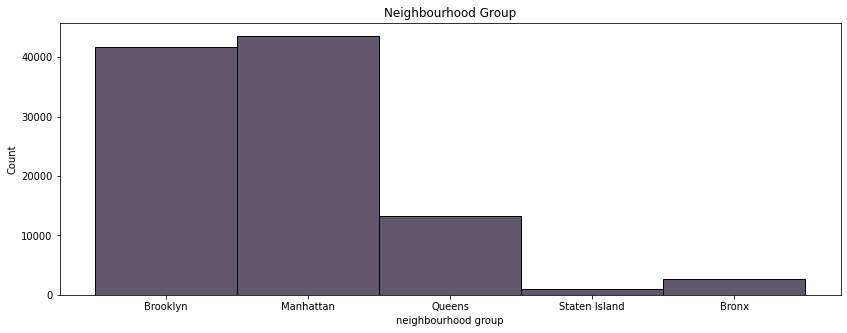

In [33]:
plt.figure(figsize=(14,5))
plt.title("Neighbourhood Group")
sns.histplot(data = df, x="neighbourhood group")

In [34]:
df.isnull().sum().sort_values(ascending=False)/len(df)

review rate number     0.003126
service fee            0.002675
price                  0.002420
number of reviews      0.001793
cancellation_policy    0.000745
neighbourhood group    0.000284
lat                    0.000078
long                   0.000078
host id                0.000000
country                0.000000
room type              0.000000
reviews per month      0.000000
dtype: float64

In [35]:
df = df.dropna()
df.isnull().sum()

host id                0
neighbourhood group    0
lat                    0
long                   0
country                0
cancellation_policy    0
room type              0
price                  0
service fee            0
number of reviews      0
reviews per month      0
review rate number     0
dtype: int64

## Change numerical columns to float

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100967 entries, 0 to 102044
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host id              100967 non-null  int64  
 1   neighbourhood group  100967 non-null  object 
 2   lat                  100967 non-null  float64
 3   long                 100967 non-null  float64
 4   country              100967 non-null  object 
 5   cancellation_policy  100967 non-null  object 
 6   room type            100967 non-null  object 
 7   price                100967 non-null  object 
 8   service fee          100967 non-null  object 
 9   number of reviews    100967 non-null  float64
 10  reviews per month    100967 non-null  float64
 11  review rate number   100967 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 10.0+ MB


**Change price and service fee from object to float**

In [37]:
df['price'] = df['price'].str.replace("$","")
df['price'] = df['price'].str.replace(',',"")
df['price'] = df['price'].astype(float)
df['price']

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_3468/1281994989.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace("$","")


0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102040     982.0
102041     946.0
102042     706.0
102043    1043.0
102044     809.0
Name: price, Length: 100967, dtype: float64

In [38]:
df['service fee'] = df['service fee'].str.replace("$","")
df['service fee'] = df['service fee'].astype(float)
df['service fee']

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_3468/698127665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee'] = df['service fee'].str.replace("$","")


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102040    196.0
102041    189.0
102042    141.0
102043    209.0
102044    162.0
Name: service fee, Length: 100967, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100967 entries, 0 to 102044
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host id              100967 non-null  int64  
 1   neighbourhood group  100967 non-null  object 
 2   lat                  100967 non-null  float64
 3   long                 100967 non-null  float64
 4   country              100967 non-null  object 
 5   cancellation_policy  100967 non-null  object 
 6   room type            100967 non-null  object 
 7   price                100967 non-null  float64
 8   service fee          100967 non-null  float64
 9   number of reviews    100967 non-null  float64
 10  reviews per month    100967 non-null  float64
 11  review rate number   100967 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 10.0+ MB


In [40]:
df['total_price'] = df['price']+df['service fee']
df.head()

,host id,neighbourhood group,lat,long,country,cancellation_policy,room type,price,service fee,number of reviews,reviews per month,review rate number,total_price
0,80014485718,Brooklyn,40.64749,-73.97237,United States,strict,Private room,966.0,193.0,9.0,0.21,4.0,1159.0
1,52335172823,Manhattan,40.75362,-73.98377,United States,moderate,Entire home/apt,142.0,28.0,45.0,0.38,4.0,170.0
2,78829239556,Manhattan,40.80902,-73.94190,United States,flexible,Private room,620.0,124.0,0.0,0.00,5.0,744.0
3,85098326012,Brooklyn,40.68514,-73.95976,United States,moderate,Entire home/apt,368.0,74.0,270.0,4.64,4.0,442.0
4,92037596077,Manhattan,40.79851,-73.94399,United States,moderate,Entire home/apt,204.0,41.0,9.0,0.10,3.0,245.0


<AxesSubplot:xlabel='total_price', ylabel='Count'>

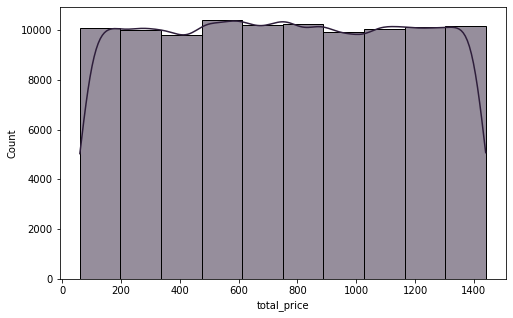

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="total_price", kde=True, bins=10)

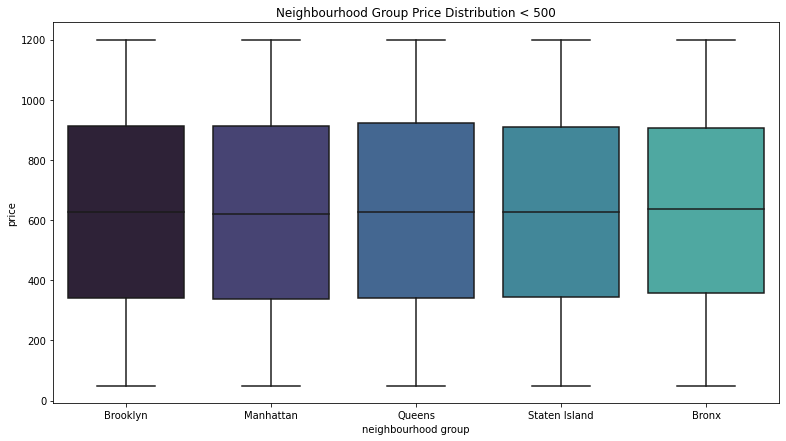

In [42]:
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood group',data = df)
plt.show()

In [43]:
price_min = df.total_price.min()
price_max = df.total_price.max()
price_mean = df.total_price.mean()

In [44]:
print(f'The minimun total price is {price_min}')
print(f'The maximum total price is {price_max}')
print(f'The mean for total price is {round(price_mean,2)}')

The minimun total price is 60.0
The maximum total price is 1440.0
The mean for total price is 750.46


### Price per neighbourhood group

In [45]:
neighb = [n for n, df in df.groupby('neighbourhood group')]
neighb

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [48]:
neighourhood = df.groupby('neighbourhood group')
neighourhood

### Room Type

/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room type', ylabel='count'>

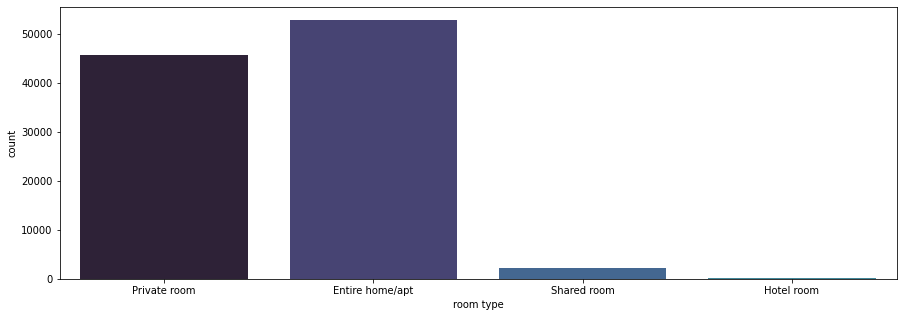

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(df['room type'])

/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood group', ylabel='count'>

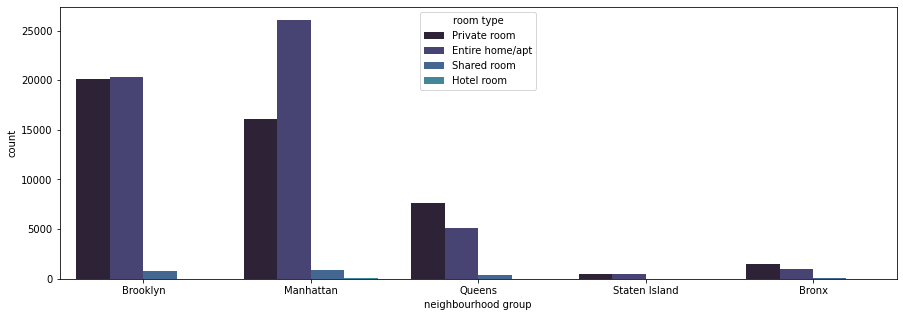

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(df['neighbourhood group'], hue=df['room type'])

### Cancellation policy

In [51]:
df['cancellation_policy'].value_counts()

moderate    33821
strict      33599
flexible    33547
Name: cancellation_policy, dtype: int64

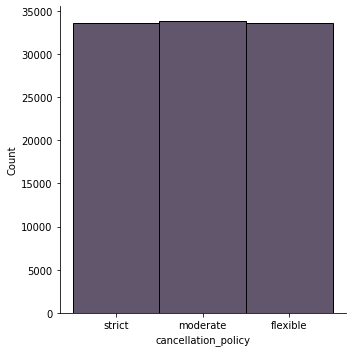

In [52]:
sns.displot(df['cancellation_policy'])

In [53]:
df.isnull().sum()

host id                0
neighbourhood group    0
lat                    0
long                   0
country                0
cancellation_policy    0
room type              0
price                  0
service fee            0
number of reviews      0
reviews per month      0
review rate number     0
total_price            0
dtype: int64